
# YELP 서비스의 리뷰 분석 (NLP)




# PROBLEM STATEMENT

- stars 컬럼은, 유저가 1점부터 5점까지 준 별점이 들어있다.
- text 컬럼은, 별점을 준 유저의 리뷰가 들어있다. 
- cool, useful, funny 컬럼은, 다른사람들이 이 리뷰 글에 투표한 숫자다. 따라서 쿨이 3개이면, 이 리뷰에 대해서 3명이 쿨에 공감했다는 뜻이다.

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

# STEP #1: IMPORT DATASET

### yelp.csv 파일을 읽어서, yelp_df 변수에 저장하고, 기본적인 통계 분석을 하시오.

In [6]:
# 경로를 맞췄으니 바로 불러올수 있음
yelp_df = pd.read_csv('yelp.csv')

In [7]:
yelp_df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [ ]:
# 긍정이냐 부정이냐 분류의문제
# 어떤것으로? stars
# 2,3,4점은 애매하니 확실한 1,5점으로 분류

# STEP #2: VISUALIZE DATASET

### 리뷰 데이터의 길이를 구하여, 새로운 컬럼 length 컬럼을 만드시오

In [10]:
yelp_df['length'] = yelp_df['text'].apply(len)


In [11]:
yelp_df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


### 리뷰의 length를 히스토그램으로 나타내시오.  

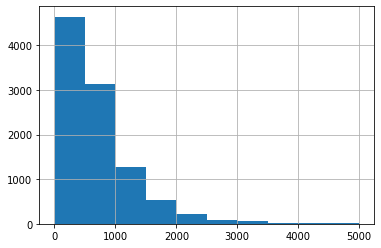

In [14]:
yelp_df['length'].hist()
plt.show()

### 리뷰가 가장 긴 글을 찾아서, 리뷰 내용을 보여주세요.

In [62]:
yelp_df.loc[ yelp_df['length'] == yelp_df['length'].max() , ]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
55,FCcFT610nQBVcRdY-devQA,2012-01-14,6jRs2P6zTYMn36fVnCu1Zw,4,"In our continuing quest to identify cool, loca...",review,40aklZ2SQPKnlTPZdvAqww,0,1,0,4997


In [ ]:
yelp_df.loc[ yelp_df['length'] == yelp_df['length'].max() , 'text' ][55]

In [20]:
yelp_df['text'][55]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

### 리뷰가 가장 짧은 리뷰는 총 몇개이며, 리뷰 내용은 무엇입니까?

In [26]:
yelp_df.loc[ yelp_df['length'] == yelp_df['length'].min() , ]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
6450,tbRu-3NR5za1SEZkszcp5Q,2012-01-03,IVoMGfn9QrZ4dATwc9HBcg,3,X,review,SHcX9hp5RG3-OqsbvissIQ,0,0,0,1


In [27]:
yelp_df['text'][6450]

'X'

### 별점은 1점부터 5점까지 입니다. 각 별점별로 리뷰가 몇개씩 있는지를 시각화 하시오.

In [64]:
yelp_df.describe()

,stars,cool,useful,funny,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [31]:
stars_count = yelp_df['stars'].value_counts()

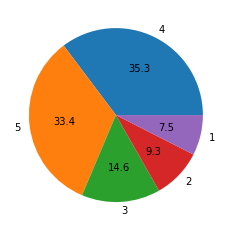

In [33]:
plt.pie( stars_count , autopct='%.1f', labels = stars_count.index )
plt.show()

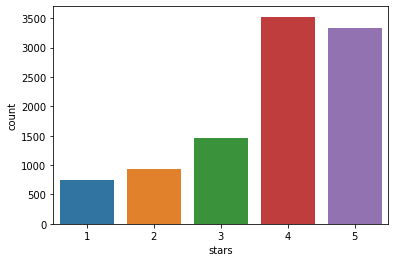

In [65]:
sns.countplot( data= yelp_df , x= 'stars' )
plt.show()

### 별점별로 리뷰가 몇개씩 있는지 시각화 하되, 내림차순으로 정렬하여 시각화 하시오.

In [66]:
my_order = yelp_df['stars'].value_counts().index

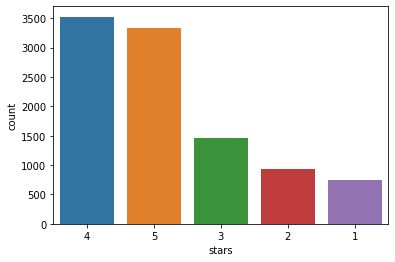

In [67]:
sns.countplot( data= yelp_df , x= 'stars' , order= my_order )
plt.show()

### 별점이 1점인 리뷰의 데이터프레임과, 별점아 5점인 데이터프레임을 각각 따로 아래의 변수에 저장하시오.
### 변수명은 yelp_df_1 , yelp_df_5 로 저장하시오.

In [42]:
yelp_df.loc[ yelp_df['stars'] == 1 , ]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [43]:
yelp_df_1 = yelp_df.loc[ yelp_df['stars'] == 1 , ]

In [44]:
yelp_df_5 = yelp_df.loc[ yelp_df['stars'] == 5 , ]

### yelp_df_1 , yelp_df_5 두개의 데이터프레임을 하나로 합치시오.  긍정과 부정의 리뷰 학습을 위해서 하나로 합치는 것이다.

In [52]:
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [47]:
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [71]:
# 합치지 않고 이렇게 억세스해도 된다

(yelp_df['stars'] == 1) | (yelp_df['stars'] == 5)

0        True
1        True
2       False
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999     True
Name: stars, Length: 10000, dtype: bool

In [74]:
yelp_df.loc[(yelp_df['stars'] == 1) | (yelp_df['stars'] == 5) , ]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [51]:
pd.concat( [yelp_df_1 , yelp_df_5] )

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [53]:
yelp_df_1_5 = pd.concat( [yelp_df_1 , yelp_df_5] )


### 별점 1과 별점 5의 리뷰는 몇개씩인지, 시각화 하시오.

In [75]:
yelp_df_1_5['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

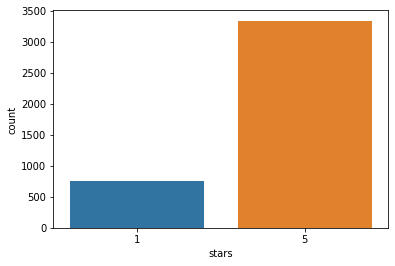

In [77]:
sns.countplot(data= yelp_df_1_5 , x= 'stars')
plt.show()

### 별점 1점과 별점 5점의 리뷰의 비율이 나오도록, 파이차트로 시각화 하시오.

In [80]:
df_pie = yelp_df_1_5['stars'].value_counts()

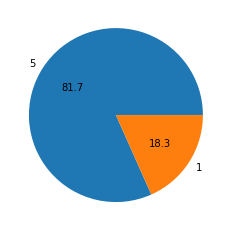

In [83]:
plt.pie(df_pie , autopct='%.1f', labels = df_pie.index )
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 Punctuation (구두점) 제거

# STEP 3.2 STOPWORDS (불용어) 제거

In [ ]:
# 테스트용 문장
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# STEP 3.3 COUNT VECTORIZER 를 사용하여, 문자를 숫자로 바꿔준다.

# 정리 : 위의 과정을 하나의 함수로 만든다.

In [84]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')

def message_cleaning(sentence) :
  # 1. 구두점 제거
  Test_punc_removed = [ char for char in sentence if char not in string.punctuation ]
  # 2. 각 글자들을 하나의 문자열로 합친다.
  Test_punc_removed_join = ''.join(Test_punc_removed)
  # 3. 문자열에 불용어가 포함되어있는지 확인해서, 불용어 제거한다.
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in my_stopwords ] 
  # 4. 결과로 남은 단어들만 리턴한다.
  return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [86]:
message_cleaning('hello~~ nice to meet you @@@')

['hello', 'nice', 'meet']

### yelp_df_1_5 데이터프레임의 text 컬럼에, 클리닝 함수를 적용한다.

In [ ]:
yelp_df_clean = 

# COUNT VECTORIZER 에 클리닝 함수를 애널라이저로 적용하여, 단어를 숫자로 바꾼다.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
vec = CountVectorizer(analyzer= message_cleaning)

In [93]:
X = vec.fit_transform( yelp_df_1_5['text'] )
# fit => 컬럼으로 만들어라

In [94]:
X

<4086x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 222391 stored elements in Compressed Sparse Row format>

In [97]:
X = X.toarray()

In [98]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [99]:
y = yelp_df_1_5['stars']

In [100]:
y

23      1
31      1
35      1
61      1
64      1
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64

# STEP#4: 학습용과 테스트용으로 데이터프레임을 나눈다. 테스트용은 20%로 설정한다. 그리고 나이브베이즈 모델링 한다.

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 7)

# STEP#5: 테스트셋으로 모델 평가. 컨퓨전 매트릭스 사용한다.

In [ ]:
# 정확도 계산

In [103]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [104]:
classifier1 = MultinomialNB()

In [105]:
classifier2 = GaussianNB()

In [107]:
classifier1.fit(X_train , y_train)

MultinomialNB()

In [110]:
y_pred1 = classifier1.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [130]:
cm1 = confusion_matrix(y_test, y_pred1)

In [113]:
accuracy_score(y_test, y_pred1)

0.9009779951100244

In [114]:
classifier2.fit(X_train, y_train)

GaussianNB()

In [116]:
y_pred2 = classifier2.predict(X_test)

In [117]:
confusion_matrix(y_test, y_pred2)

array([[ 56, 111],
       [ 76, 575]])

In [118]:
accuracy_score(y_test, y_pred2)

0.7713936430317848

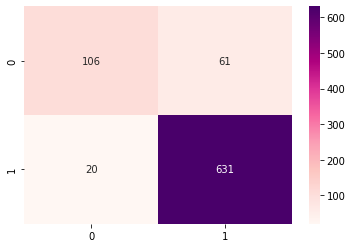

In [133]:
sns.heatmap(data = cm1, annot= True, cmap= 'RdPu' , fmt='.0f')
plt.show()

# STEP#6 다음 문장이 긍정인지 부정인지 예측하시오.


### 1. 'amazing food! highly recommmended'
### 2. 'shit food, made me sick'

In [119]:
sen_list = ['amazing food! highly recommmended' , 'shit food, made me sick']

In [120]:
sen_list

['amazing food! highly recommmended', 'shit food, made me sick']

In [121]:
vec.transform(sen_list)

<2x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [122]:
X = vec.transform(sen_list)

In [124]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [125]:
X = X.toarray()

In [127]:
sen_pred = classifier1.predict(X)

In [136]:
sen_pred
# 1점이 5개 5점이 1개

array([5, 1])

In [138]:
y_test

3486    5
1035    5
9911    5
122     5
3982    5
       ..
5783    5
4584    5
2180    5
7182    5
4320    5
Name: stars, Length: 818, dtype: int64

In [134]:
y_test.shape

(818,)

In [135]:
sen_pred.shape

(2,)

In [128]:
accuracy_score(y_test, sen_pred )

# 정답을 맞출 사이즈가 안맞으니 이건안됨

ValueError: ignored

In [ ]:
# 서포트 백터 머신으로 인공지능을 만들어 보세요

In [139]:
from sklearn.svm import SVC

In [140]:
classifier3 = SVC(kernel= 'linear' , random_state= 3)

In [141]:
classifier3.fit(X_train, y_train)

SVC(kernel='linear', random_state=3)

In [143]:
y_pred3 = classifier3.predict(X_test)

In [144]:
confusion_matrix(y_test, y_pred3)

array([[115,  52],
       [ 24, 627]])

In [145]:
accuracy_score(y_test, y_pred3)

0.9070904645476773

In [146]:
classifier3.predict(X)

array([5, 1])